In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [6]:
df = pd.read_csv('medical_lifestyle_with_targets.csv')

In [7]:
print("Shape of dataset:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSummary statistics:")
print(df.describe())

Shape of dataset: (4000, 32)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   serum_creatinine         4000 non-null   float64
 1   gfr                      4000 non-null   float64
 2   bun                      4000 non-null   float64
 3   serum_calcium            4000 non-null   float64
 4   ana                      4000 non-null   float64
 5   c3_c4                    4000 non-null   float64
 6   hematuria                4000 non-null   float64
 7   oxalate_levels           4000 non-null   float64
 8   urine_ph                 4000 non-null   float64
 9   blood_pressure           4000 non-null   float64
 10  physical_activity        4000 non-null   object 
 11  diet                     4000 non-null   object 
 12  water_intake             4000 non-null   float64
 13  smoking                  4000 non-null   o

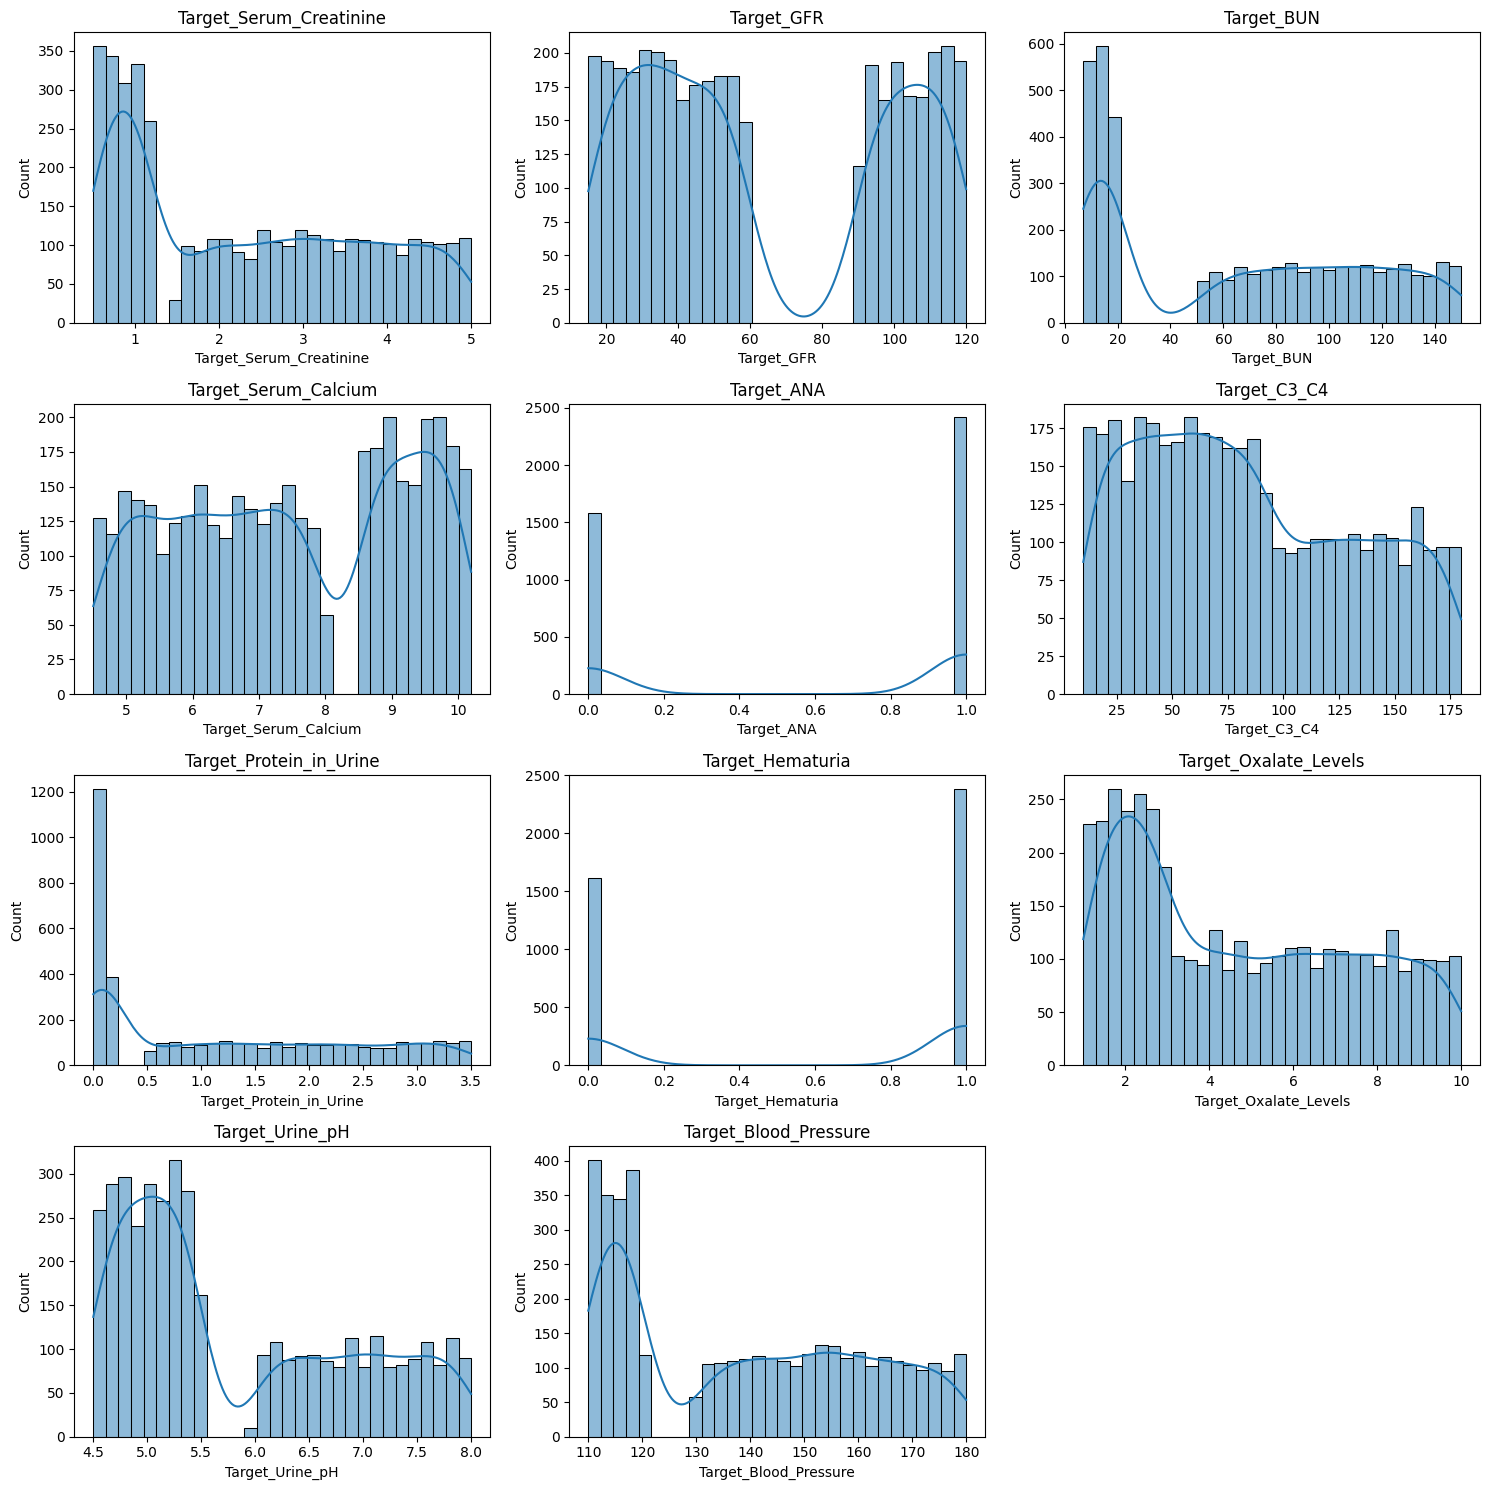

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of target variables
targets = [
    "Target_Serum_Creatinine", "Target_GFR", "Target_BUN",
    "Target_Serum_Calcium", "Target_ANA", "Target_C3_C4",
    "Target_Protein_in_Urine", "Target_Hematuria", "Target_Oxalate_Levels",
    "Target_Urine_pH", "Target_Blood_Pressure"
]

plt.figure(figsize=(15, 15))
for i, col in enumerate(targets):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


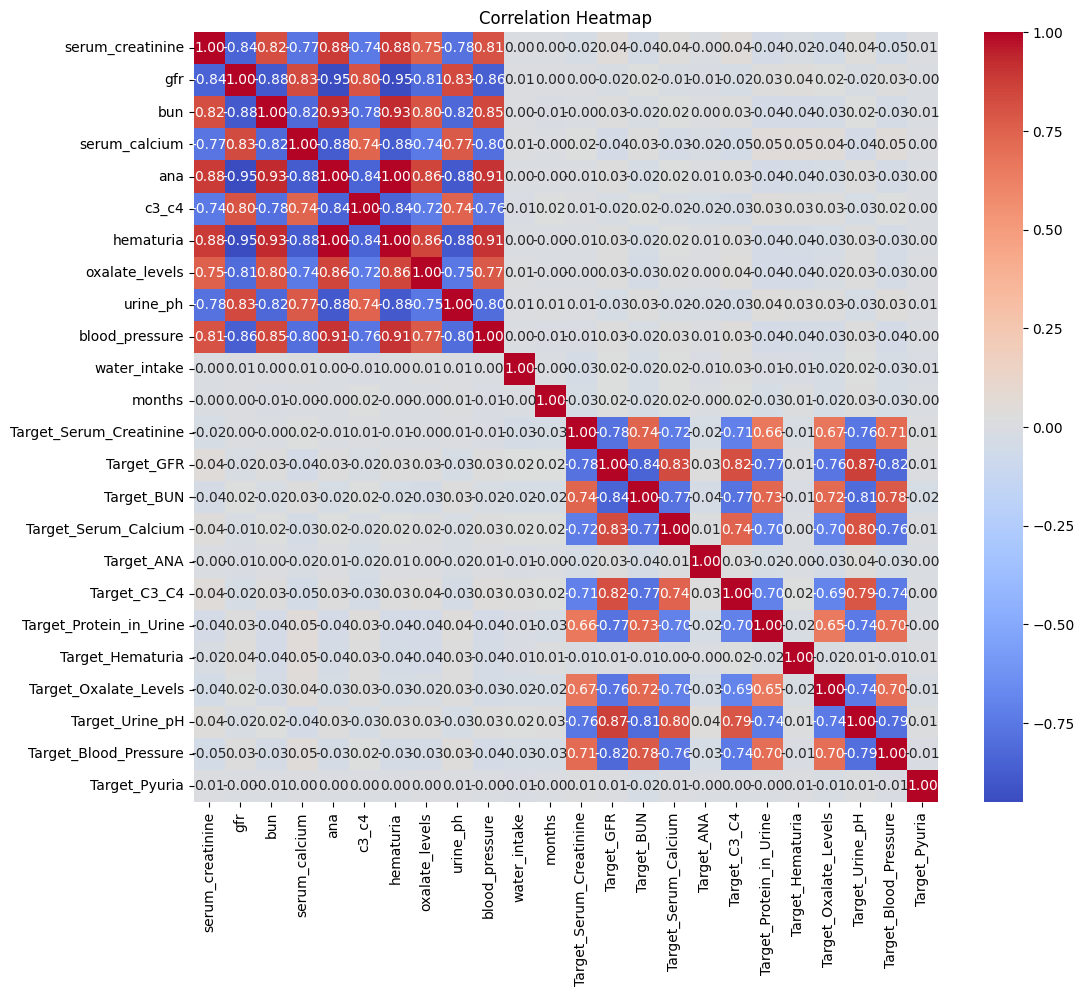

In [9]:
# Correlation heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
X = df.drop(columns=["Target_Serum_Creatinine", "Target_GFR","Target_BUN","Target_Serum_Calcium","Target_ANA","Target_C3_C4","Target_Protein_in_Urine","Target_Hematuria","Target_Oxalate_Levels","Target_Urine_pH","Target_Blood_Pressure","Target_Pyuria"])
y = df[["Target_Serum_Creatinine", "Target_GFR","Target_BUN","Target_Serum_Calcium","Target_ANA","Target_C3_C4","Target_Hematuria","Target_Oxalate_Levels","Target_Urine_pH","Target_Blood_Pressure"]]  


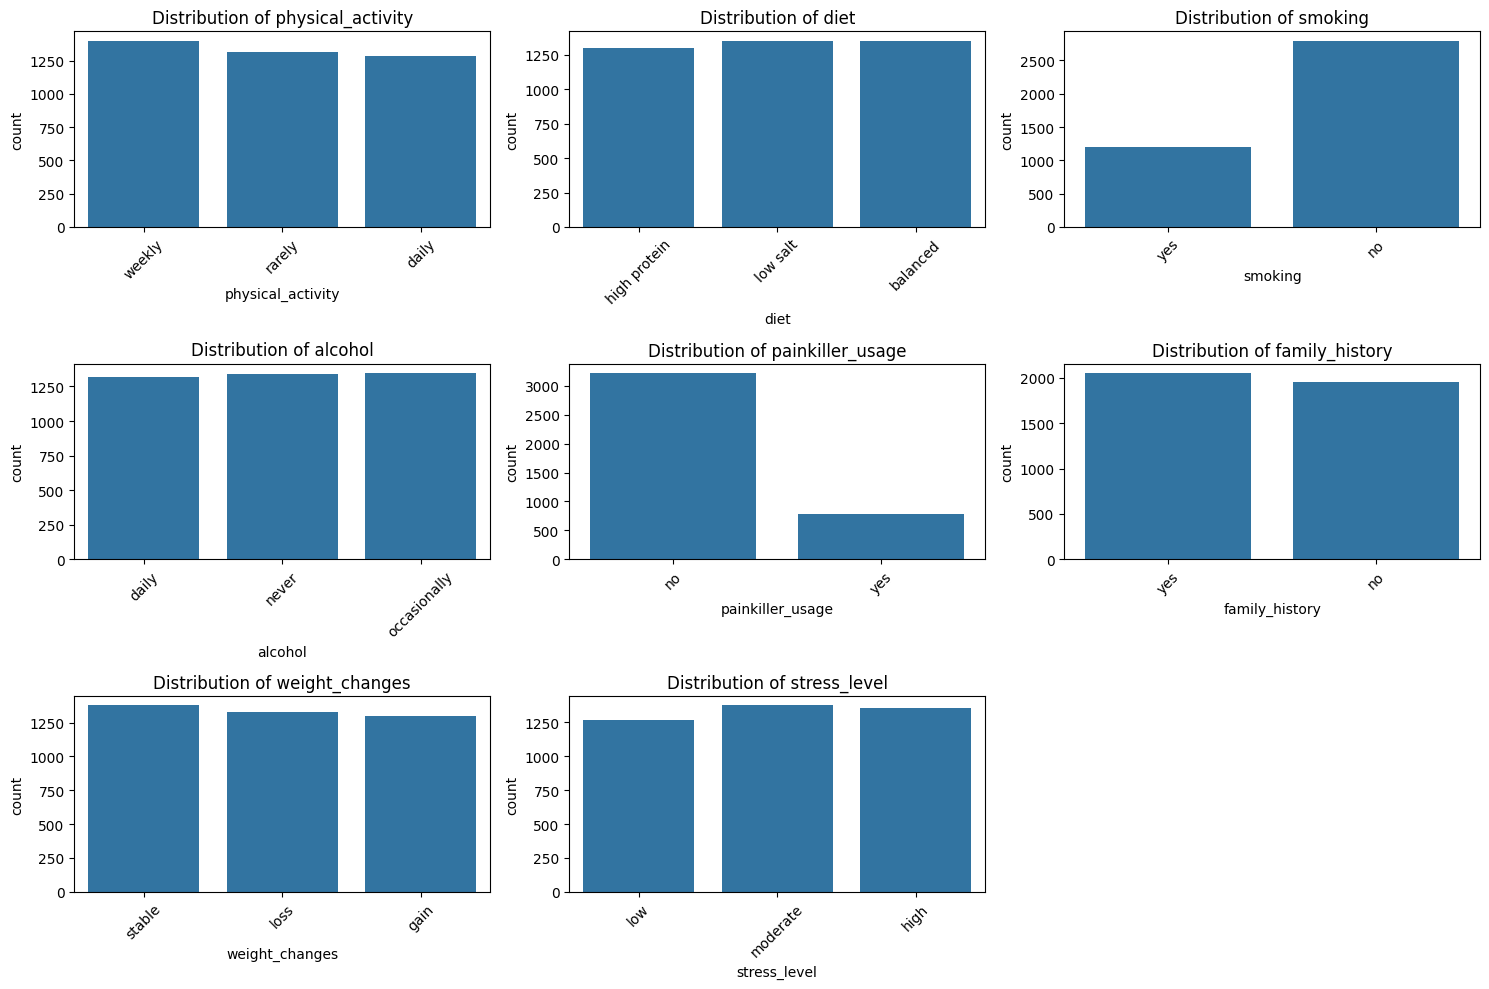

In [11]:
categorical_features = ["physical_activity", "diet", "smoking", "alcohol",
                        "painkiller_usage", "family_history", "weight_changes", "stress_level"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


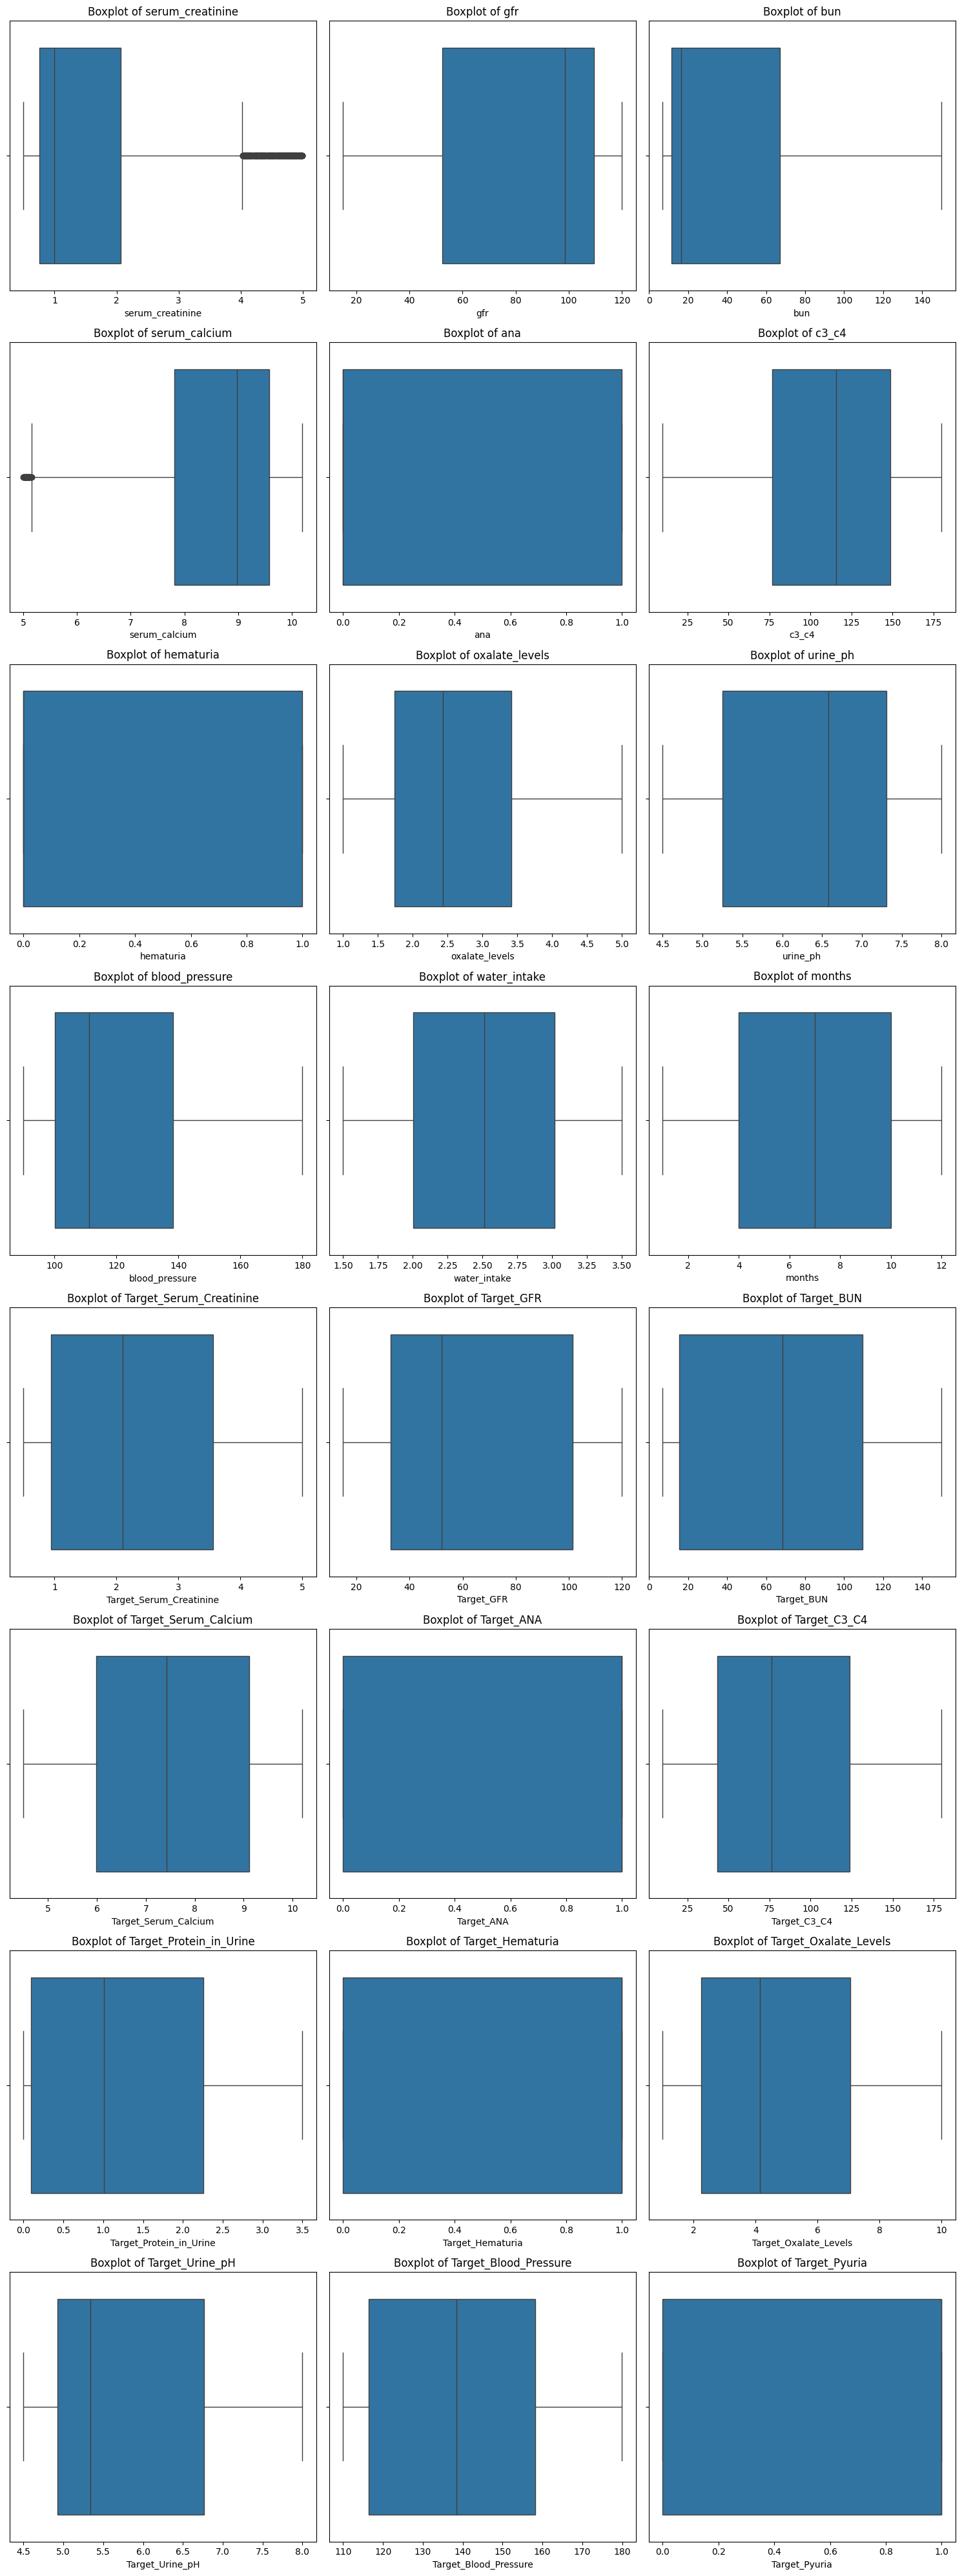

In [12]:
import math

# Calculate the required grid size
num_features = len(numerical_features)
rows = math.ceil(num_features / 3)  # Adjust rows dynamically

plt.figure(figsize=(15, rows * 5))  # Adjust figure height based on rows
for i, col in enumerate(numerical_features):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


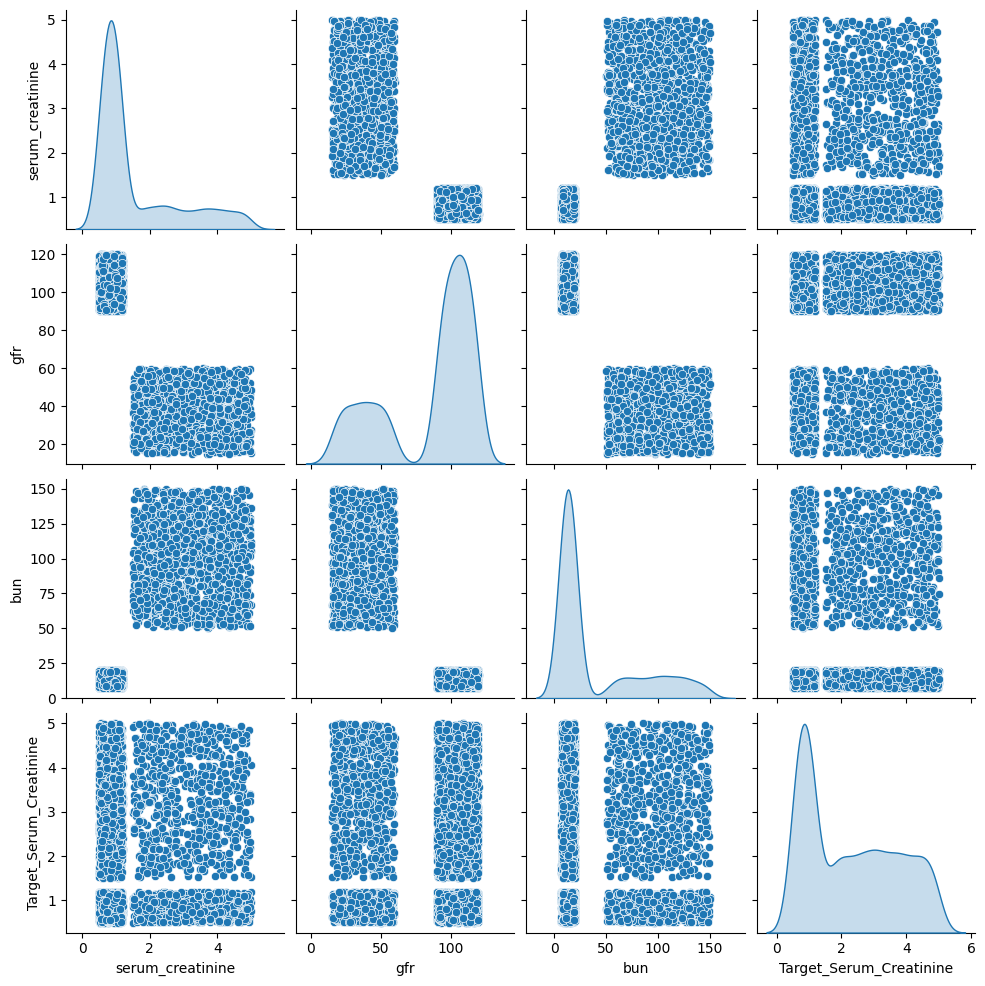

In [13]:
# Pairplot for a subset of features
sns.pairplot(df[["serum_creatinine", "gfr", "bun", "Target_Serum_Creatinine"]], diag_kind="kde")
plt.show()


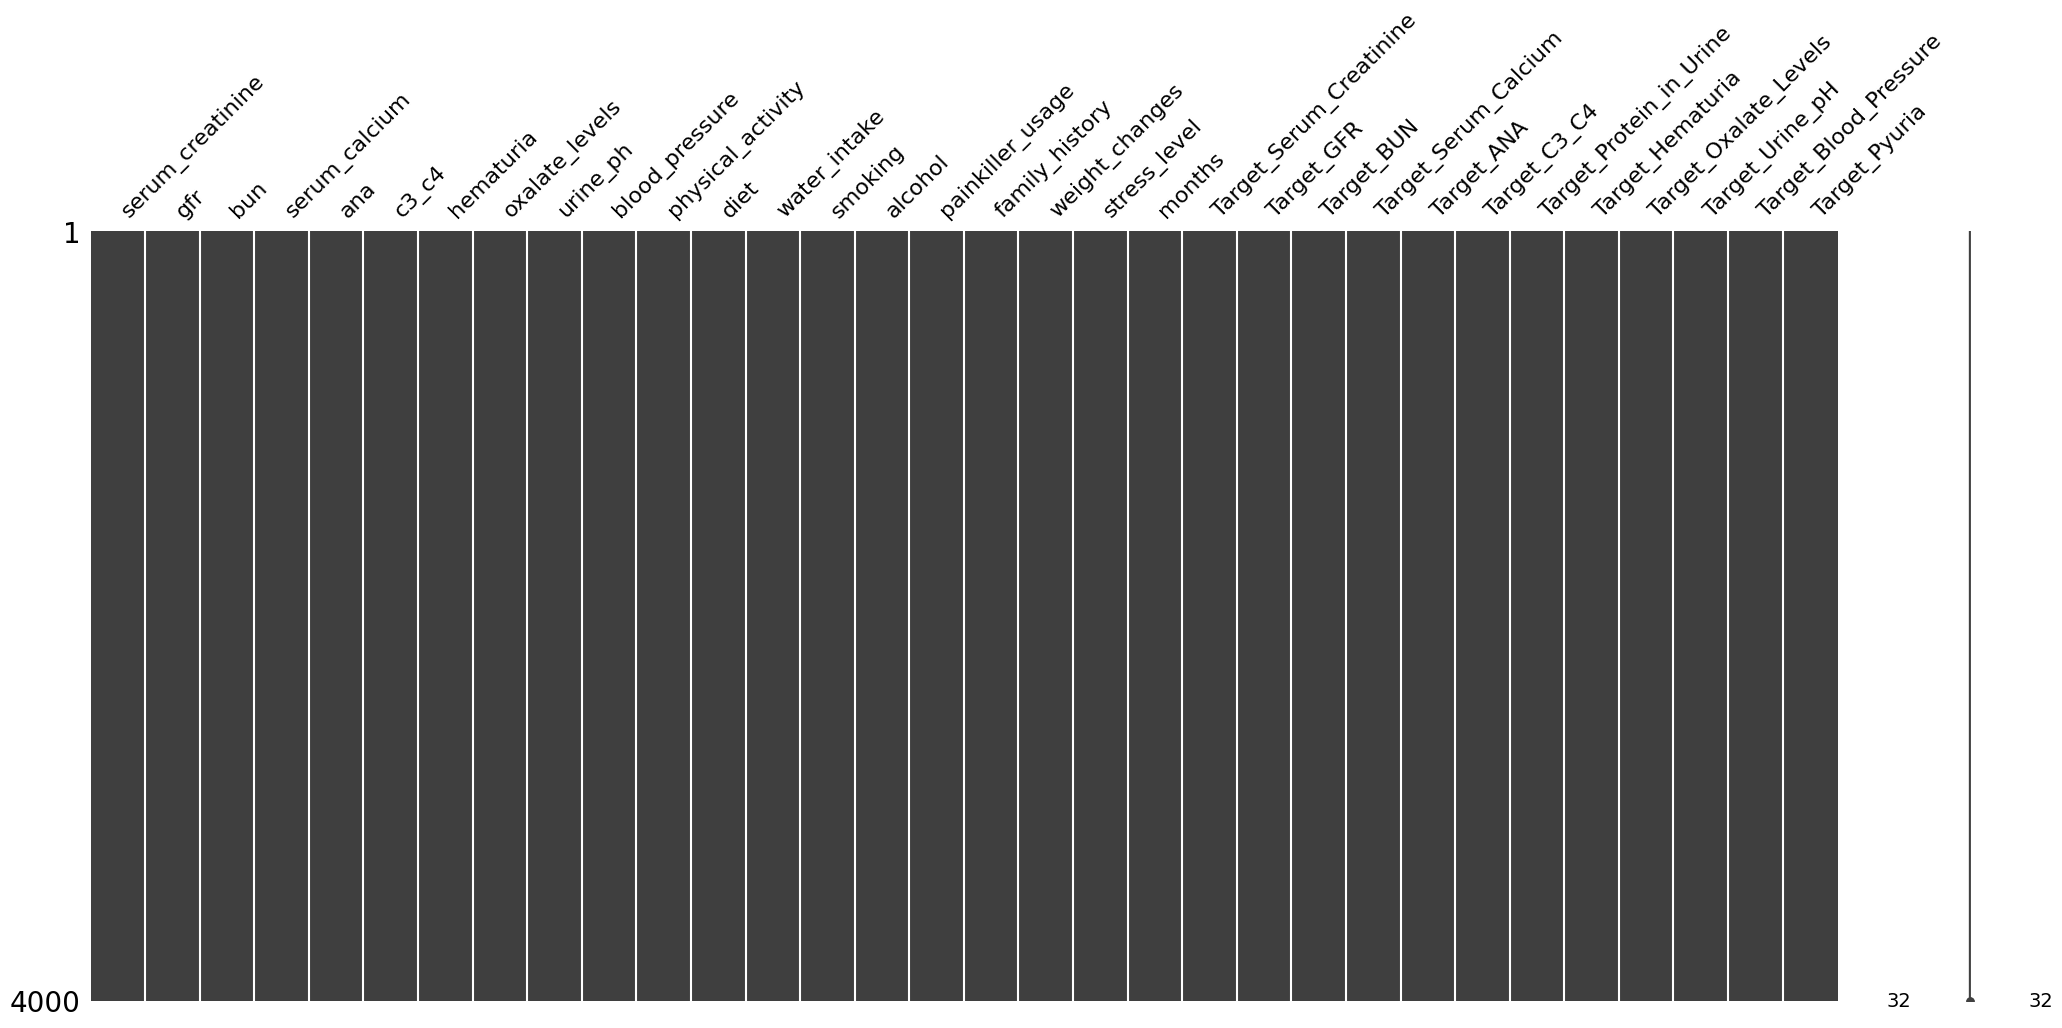

c:\Users\admin\OneDrive\Desktop\Kidney Analysis\backend\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\admin\OneDrive\Desktop\Kidney Analysis\backend\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


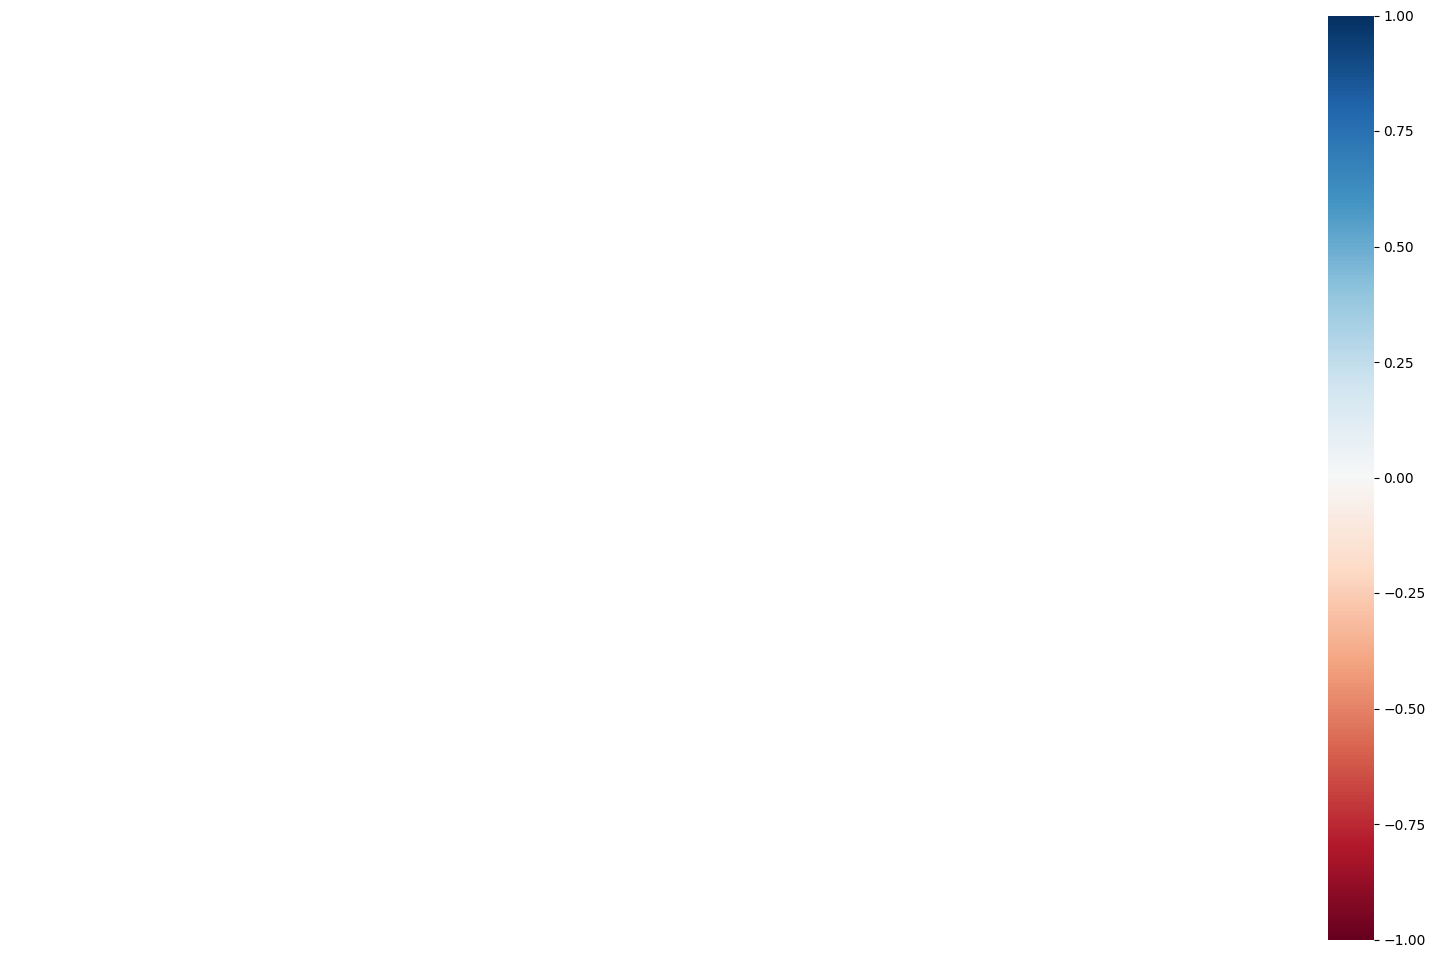

In [14]:
import missingno as msno

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()


In [15]:
categorical_features = ["physical_activity", "diet", "smoking", "alcohol", "painkiller_usage", "family_history", "weight_changes", "stress_level"]

In [16]:
numerical_features = [
    "water_intake",
    "serum_creatinine",
    "gfr",
    "bun",
    "serum_calcium",
    "ana",
    "c3_c4",
    "hematuria",
    "oxalate_levels",
    "urine_ph",
    "blood_pressure",
    "months",
]


In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_features),
        ("num", StandardScaler(), numerical_features),
    ]
)


In [18]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['physical_activity', 'diet',
                                                   'smoking', 'alcohol',
                                                   'painkiller_usage',
                                                   'family_history',
                                                   'weight_changes',
                                                   'stress_level']),
                                                 ('num', StandardScaler(),
                                                  ['water_intake',
                                                   'serum_creatinine', 'gfr',
                                                   'bun', 'serum_calcium',
                                                   'ana', 'c3_c4', 'hematuria',
                                                   'oxalate_levels', 'urine_ph',
                                                   'blood_pressure',
                                                   'months'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [20]:
y_pred = pipeline.predict(X_test)


In [21]:
def predict_future(params):
    """Predict future medical parameters for a given set of inputs."""
    input_df = pd.DataFrame([params])
    return pipeline.predict(input_df)

# Example usage
new_user = {
    "physical_activity": "weekly",
    "diet": "balanced",
    "water_intake": 2.5,
    "smoking": "no",
    "alcohol": "never",
    "painkiller_usage": "no",
    "family_history": "yes",
    "weight_changes": "stable",
    "stress_level": "moderate",
    "serum_creatinine": 1.0,
    "gfr": 75,
    "bun": 15,
    "serum_calcium": 9.2,
    "ana": 0,
    "c3_c4": 1.1,
    "hematuria": 0,
    "oxalate_levels": 1.9,
    "urine_ph": 6.5,
    "blood_pressure": 115,
    "months": 6,
}

future_params = predict_future(new_user)
print("Predicted Future Parameters:", future_params)

Predicted Future Parameters: [[  2.1610556   70.52596041  55.82478243   7.6445849    0.55
   93.19253646   0.58         4.21102301   6.05729385 135.89098862]]


In [22]:

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

In [23]:
try:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
except:
    print("Skipping regression metrics as the target is likely classification.")

Mean Absolute Error: 14.452591236730456
Mean Squared Error: 652.2750966640426
R² Score: -0.029195350092579852


In [24]:
try:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC Score: {roc_auc}")
except:
    print("Skipping classification metrics as the target is likely regression.")

Skipping classification metrics as the target is likely regression.


In [25]:
# import joblib

# model_filename = "future_params.joblib"
# with open(model_filename, "wb") as file:
#     joblib.dump(pipeline, file)

# print(f"Model saved as {model_filename}")

In [26]:
import pickle

model_filename = "future_params.pkl"  # Change file extension for clarity
with open(model_filename, "wb") as file:
    pickle.dump(pipeline, file)  # Use pickle.dump instead of joblib.dump

print(f"Model saved as {model_filename}")

Model saved as future_params.pkl
